In [ ]:
# Import the packages

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DM&KD/Market_Basket_Optimisation.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
df.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,34562.000000,34557.000000,34557.000000,34562.000000,3.456200e+04,34562.000000,34562.000000,34562.000000
mean,17280.500000,20.503248,0.444269,65.281684,2.949855e+04,9.874689,3.604913,15.477548
std,9977.334338,77.836489,0.302218,152.026311,7.973480e+04,64.937144,10.501039,15.359834
min,0.000000,0.000000,0.000714,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,8640.250000,0.372385,0.191011,6.666667,5.280000e+02,1.000000,1.000000,5.000000
50%,17280.500000,2.185226,0.384615,15.000000,5.901000e+03,1.000000,1.000000,10.000000
75%,25920.750000,9.435875,0.666667,58.000000,2.493900e+04,3.000000,2.000000,21.000000
max,34561.000000,2333.627333,1.000000,2800.000000,2.787530e+06,1462.000000,219.000000,178.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34562 entries, 0 to 34561
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      34562 non-null  int64  
 1   inter_api_access_duration(sec)  34557 non-null  float64
 2   api_access_uniqueness           34557 non-null  float64
 3   sequence_length(count)          34562 non-null  float64
 4   vsession_duration(min)          34562 non-null  int64  
 5   ip_type                         34562 non-null  object 
 6   behavior                        34562 non-null  object 
 7   behavior_type                   34562 non-null  object 
 8   num_sessions                    34562 non-null  float64
 9   num_users                       34562 non-null  float64
 10  num_unique_apis                 34562 non-null  float64
 11  source                          34562 non-null  object 
dtypes: float64(6), int64(2), object(

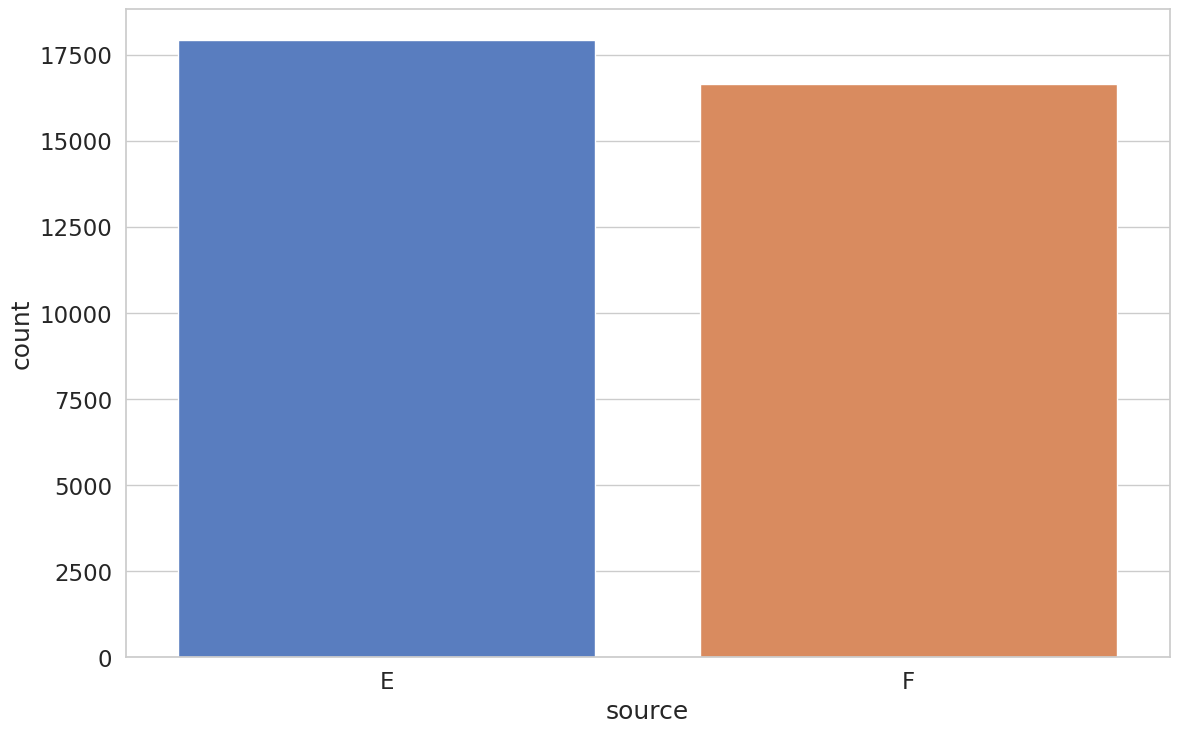

In [ ]:
sns.countplot(x='source',data=df)
plt.show()

In [ ]:
grouped = df.groupby('source').agg({'inter_api_access_duration(sec)':['mean', 'std', min, max],
                                       'api_access_uniqueness':['mean', 'std', min, max],
                                       'sequence_length(count)':['mean', 'std', min, max],
                                       'num_sessions':['mean', 'std', min, max],
                                       'num_users':['mean', 'std', min, max],
                                       'num_unique_apis':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

,inter_api_access_duration(sec)_mean,inter_api_access_duration(sec)_std,inter_api_access_duration(sec)_min,inter_api_access_duration(sec)_max,api_access_uniqueness_mean,api_access_uniqueness_std,api_access_uniqueness_min,api_access_uniqueness_max,sequence_length(count)_mean,sequence_length(count)_std,...,num_sessions_min,num_sessions_max,num_users_mean,num_users_std,num_users_min,num_users_max,num_unique_apis_mean,num_unique_apis_std,num_unique_apis_min,num_unique_apis_max
source,,,,,,,,,,,,,,,,,,,,,
E,13.742644,56.662352,0.00001,2333.627333,0.477938,0.294700,0.000714,1.0,95.477527,191.900973,...,1.0,1462.0,1.864996,9.158738,1.0,219.0,18.959091,17.972263,0.0,178.0
F,27.779306,94.983100,0.00000,1527.227000,0.408034,0.306003,0.000714,1.0,32.774527,79.443045,...,1.0,300.0,5.478010,11.485639,1.0,99.0,11.729512,10.728324,1.0,95.0


In [ ]:
# 0 = default, 1 = private_ip and 2 = others
df["ip_type"] = df["ip_type"].apply(lambda x: 0 if x=="default" else (1 if x=="private_ip" else 2))
df["behavior_type"] = df["behavior_type"].apply(lambda x: 0 if x=="outlier" else 1)
df["behavior"] = df["behavior"].apply(lambda x: 0 if x=="outlier" else 1)
df["source"] = df["source"].apply(lambda x: 0 if x=="E" else 1)

<Figure size 1200x800 with 0 Axes>

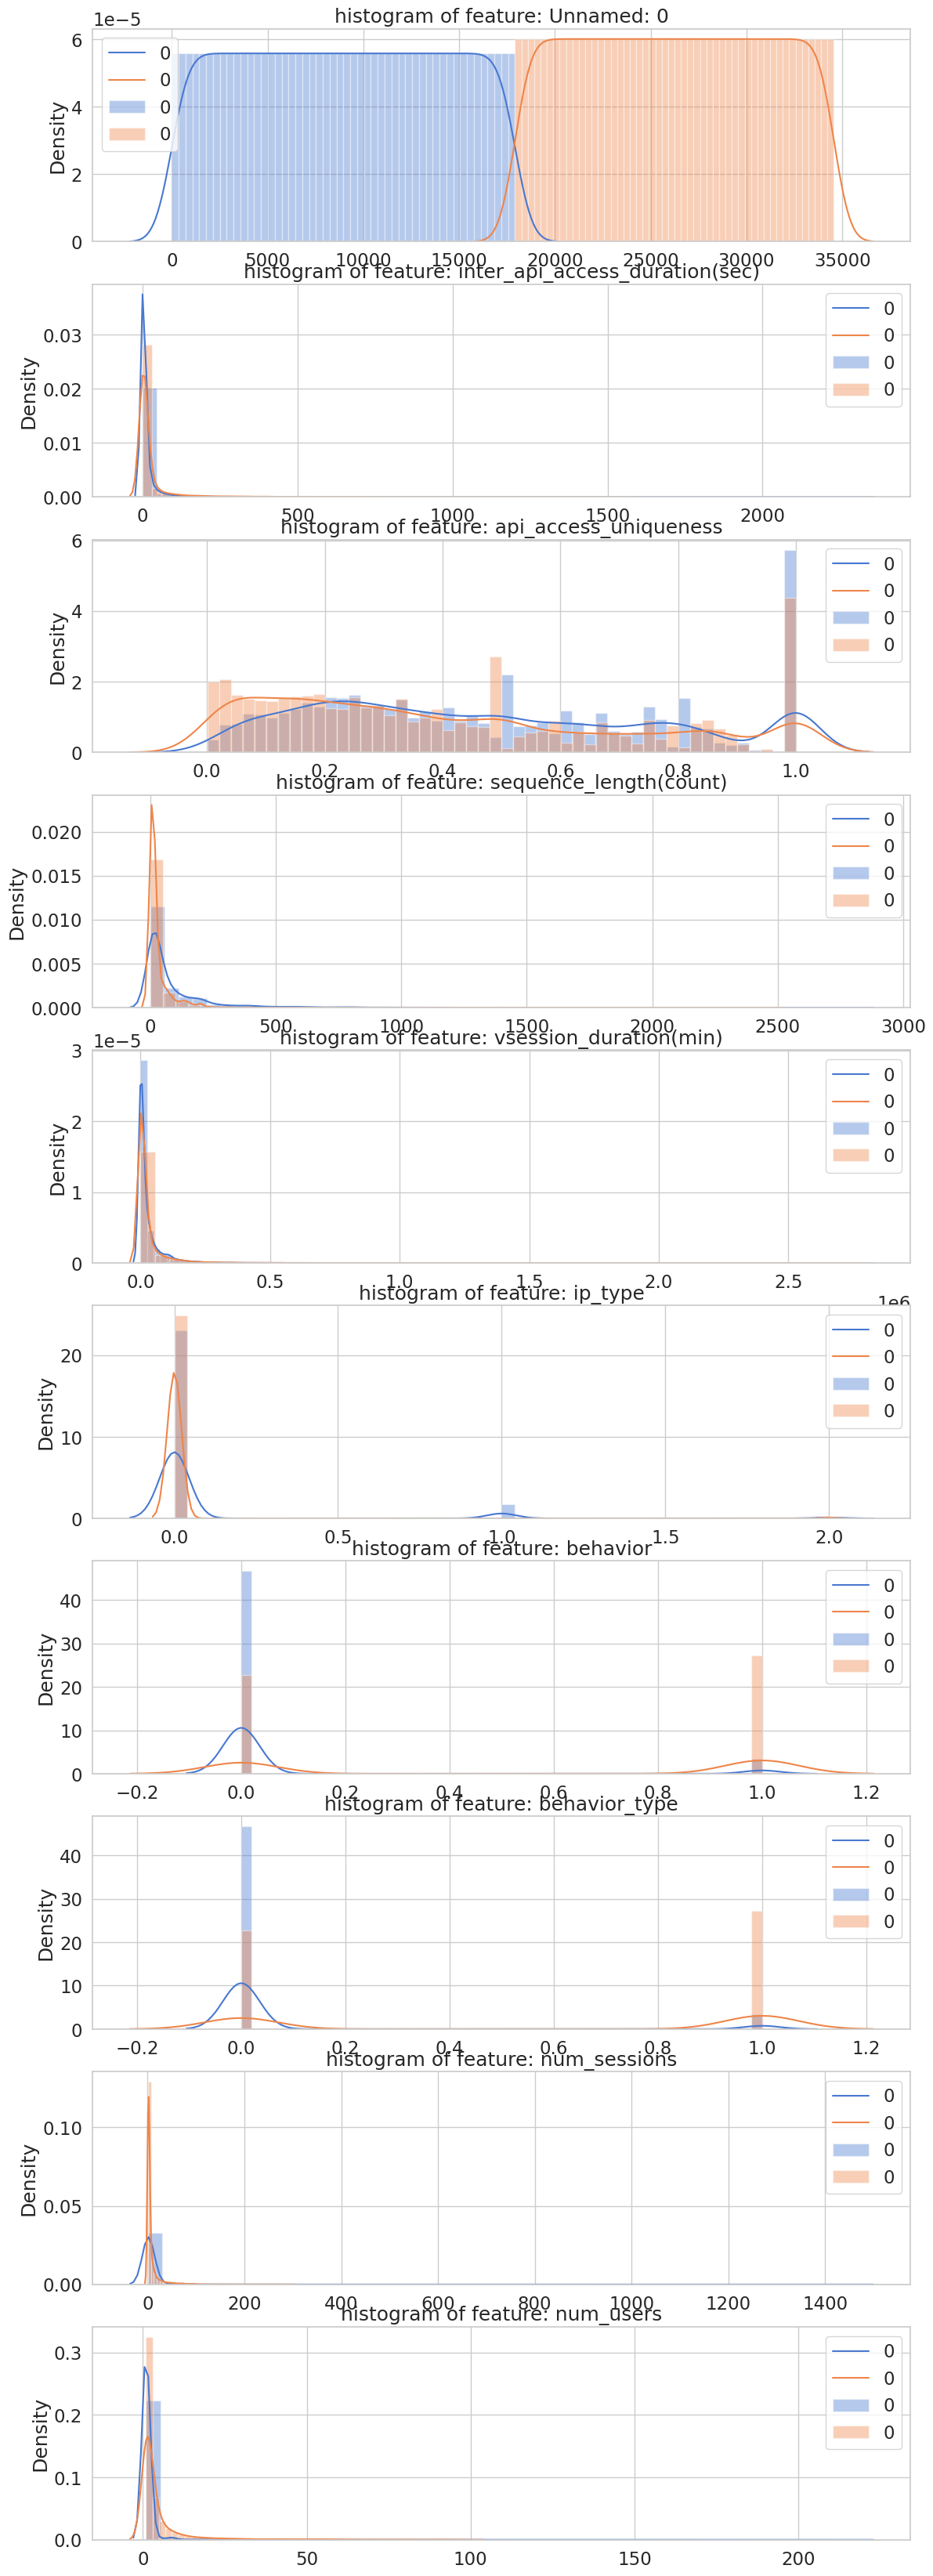

In [ ]:
plt.subplots_adjust(top=5)
columns=df.columns[:10]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.source == 0], bins=50)
    sns.distplot(df[cn][df.source == 1], bins=50)
    ax.set_xlabel('')
    plt.legend(df["source"])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

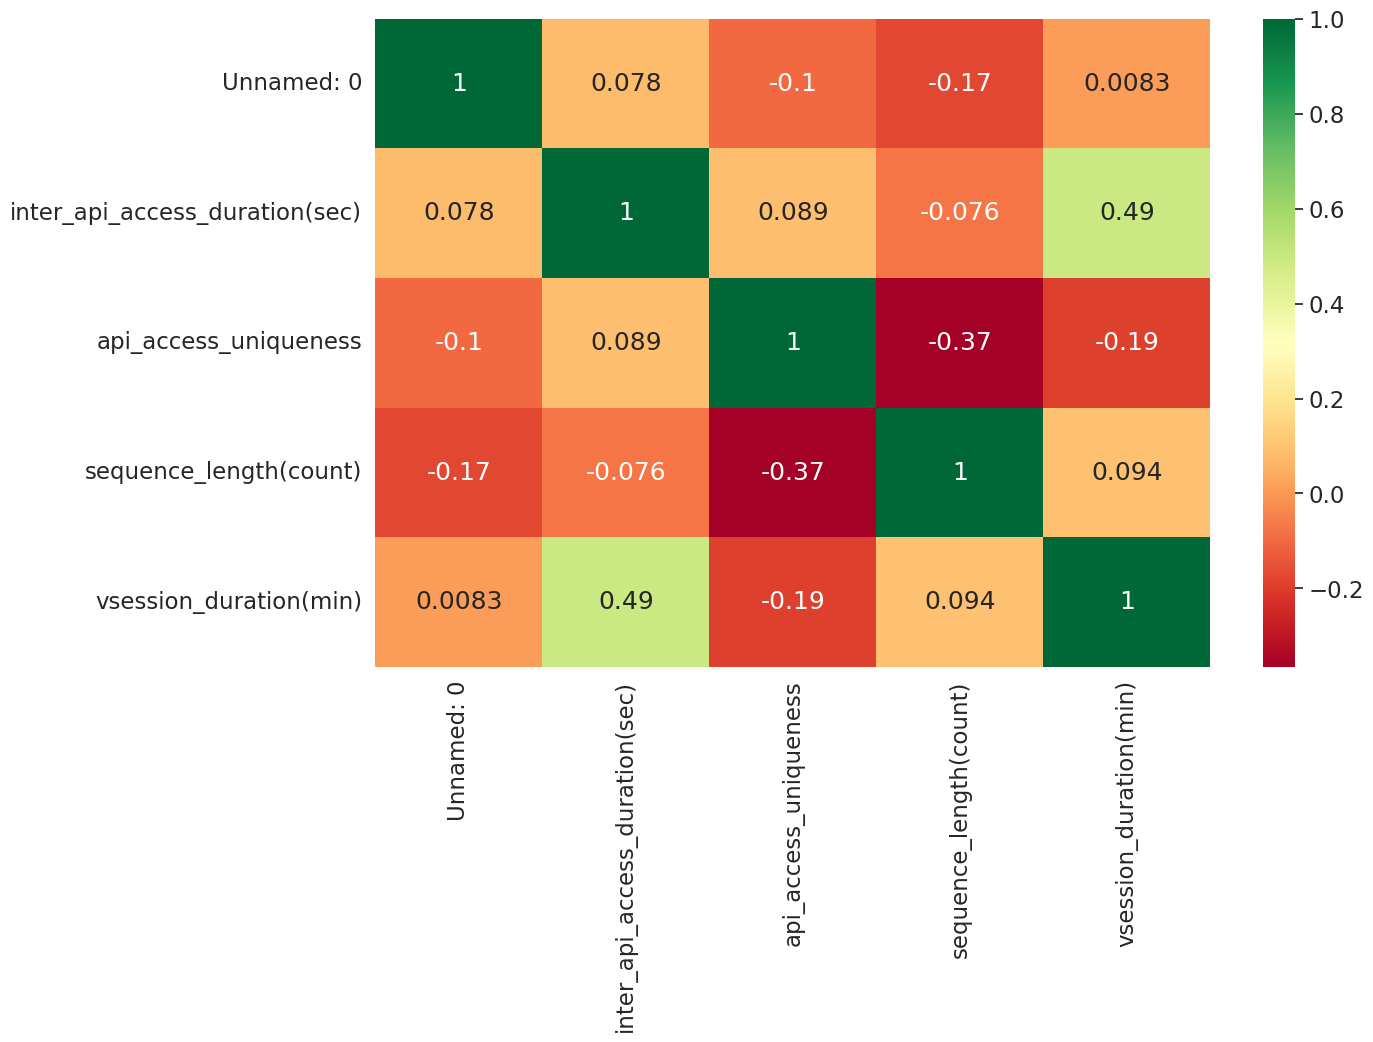

In [ ]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

In [ ]:
# Replacing missing field values with user-defined constants.


df['inter_api_access_duration(sec)'] = df['inter_api_access_duration(sec)'].fillna(0.0, inplace=False)
df['api_access_uniqueness'] = df['api_access_uniqueness'].fillna(0.0, inplace=False)

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  inter_api_access_duration(sec)  api_access_uniqueness  \
0               0                        7.010387               0.419355   
1               1                       51.419393               0.252336   
2               2                       25.860775               0.275000   
3               3                        0.205909               0.818182   
4               4                        0.122125               0.812500   
...           ...                             ...                    ...   
34557       34557                        0.030952               0.016275   
34558       34558                        2.300500               0.300000   
34559       34559                        0.393229               0.044610   
34560       34560                        0.394731               0.166667   
34561       34561                       11.825600               0.800000   

       sequence_length(count)  vsession_duration(min)

In [ ]:
outcome=df['source']
data=df[df.columns[:10]]

train,test = train_test_split(df,test_size=0.25,random_state=0,stratify=df['source'])# stratify the outcome

train_X=train[train.columns[:10]]
test_X=test[test.columns[:10]]
train_Y=train['source']
test_Y=test['source']

In [ ]:
print(train_X.shape)
print(test_X.shape)

(25921, 10)
(8641, 10)


In [ ]:
features = train_X.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std


In [ ]:
accuracy_scores=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction,test_Y))

models_dataframe=pd.DataFrame(accuracy_scores,index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=False)

,Accuracy
Decision Tree,1.000000
Random forest,1.000000
Linear Svm,0.997107
Logistic Regression,0.995718
Radial Svm,0.993751
KNN,0.992593
Naive Bayes,0.958454


In [ ]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

Unnamed: 0                        0.705150
num_users                         0.107436
behavior_type                     0.044144
behavior                          0.039779
num_sessions                      0.027557
vsession_duration(min)            0.021451
inter_api_access_duration(sec)    0.020655
sequence_length(count)            0.019930
api_access_uniqueness             0.007706
ip_type                           0.006191
dtype: float64

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [ ]:
# Starting with the original dataset and then doing centering and scaling
features=df[df.columns[:10]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)',
                                          'ip_type', 'behavior', 'behavior_type', 'num_sessions','num_users','num_unique_apis'])
X['source']=df['source']

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:10]], X['source'], cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=False)

,CV Mean
Decision Tree,1.000000
Random forest,1.000000
Linear Svm,0.997338
Logistic Regression,0.996441
Radial Svm,0.994618
KNN,0.993490
Naive Bayes,0.962473


In [ ]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

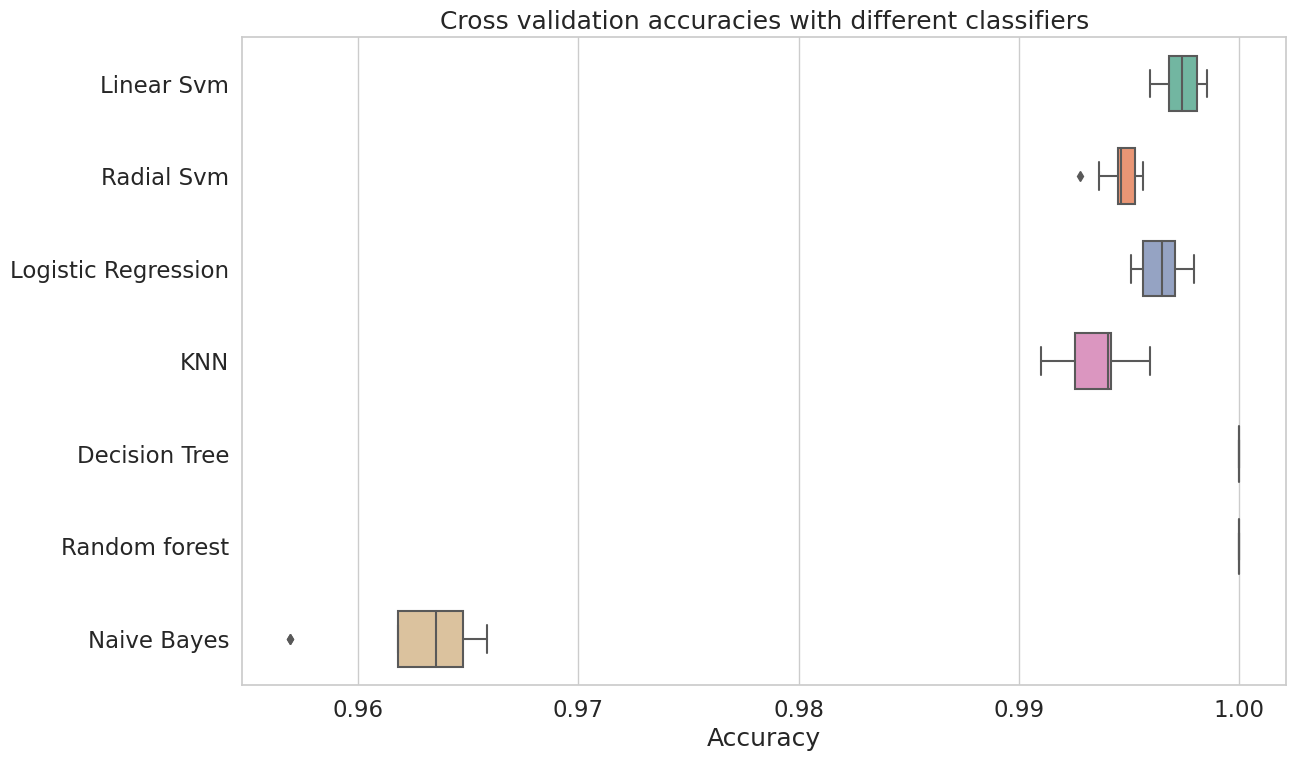

In [ ]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

In [ ]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [ ]:
from some_module import EnsembleModel

ensembleModel = EnsembleModel()


In [ ]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)],
                                            voting='soft', weights=[3,1,2])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [ ]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

NameError: ignored